In [1]:
import pandas as pd


# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
plot_file = "../data/oligogenic/oligo_table.csv"
plot_df = pd.read_csv(plot_file)

In [5]:
plot_df.category.value_counts()

lifestyles only         27955
genes only               7095
combos                   1570
no gene or lifestyle     1450
Name: category, dtype: int64

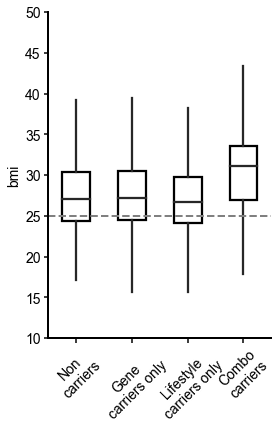

In [30]:
fig,ax = plt.subplots(figsize=(4, 6))

sns_box = sns.boxplot(
    data=plot_df, y="bmi", 
    x="category", order =[ "no gene or lifestyle", "genes only", "lifestyles only", "combos",],
    hue="category", hue_order=[ "no gene or lifestyle", "genes only", "lifestyles only", "combos",],
    palette=["#008176", "#00ADEE", "#ff7f0e", "#FF3688", ],  # '#D1245D', '#00ADEE', '#D1245D', '#00ADEE' "#0000a7" "#eecc16"
    dodge=False, width=0.5, linewidth=2.25, fliersize=0, capprops={'color':'none'}, boxprops={'facecolor':'none', 'edgecolor':'k'}) # 


# Adjust Axis
# ax.set_yticks([-0.02, 0, 0.02, 0.04])
ax.set_ylim((10, 50))
# ax.set_ylabel('Percentage')
ax.set_xticklabels([ "Non\ncarriers", "Gene\ncarriers only", "Lifestyle\ncarriers only", "Combo\ncarriers", ], rotation=45, )
ax.set_xlabel("")

# Remove Spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False);

ax.axes.legend_.remove()
# sns_ax = sns.violinplot(
#     data=plot_df, y="bmi", 
#     x="category", order =[ "no gene or lifestyle", "genes only", "lifestyles only", "combos",],
#     hue="category", hue_order=[ "no gene or lifestyle", "genes only", "lifestyles only", "combos",],
#     palette=["#008176", "#08509b", "#ff7f0e", "#a30f15", ],
#     scale="area",
#     linewidth=2.5,
#     width=0.5,
#     dodge=False,
#     bw=0.75,
#     cut=2,
#     ax=ax
#     )
# # sns.stripplot(data=plot_df, y="bmi", x="category", color="k", ax=ax, s=2, alpha=0.1)
ax.axhline(y=25, linewidth=2, color='grey', linestyle='--')
# ax.set_xlabel("")
# ax.set_ylabel("BMI")
# # legend below as multiple columns
# h,l = sns_ax.axes.get_legend_handles_labels()
# sns_ax.axes.legend_.remove()
# sns_ax.legend(h,l, loc="upper center", ncol=4, bbox_to_anchor=(0.5, -0.1))


In [31]:
save_file = "/data5/deepro/ukbiobank/papers/bmi_project/4_characterization/lifestyle_white_british/data/oligogenic/oligo.pdf"
save_pdf(save_file, fig)

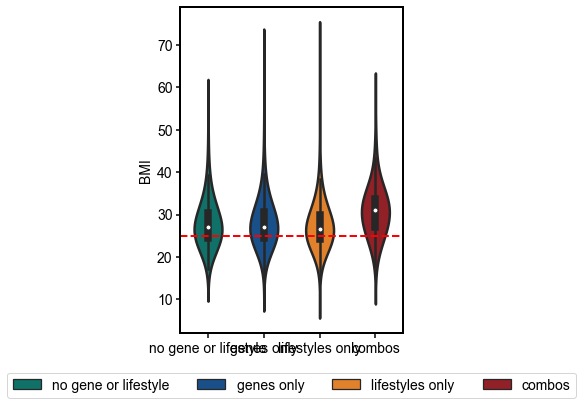

In [28]:
fig,ax = plt.subplots(figsize=(4, 6))
sns_ax = sns.violinplot(
    data=plot_df, y="bmi", 
    x="category", order =[ "no gene or lifestyle", "genes only", "lifestyles only", "combos",],
    hue="category", hue_order=[ "no gene or lifestyle", "genes only", "lifestyles only", "combos",],
    palette=["#008176", "#08509b", "#ff7f0e", "#a30f15", ],
    scale="area",
    linewidth=2.5,
    width=0.5,
    dodge=False,
    bw=0.75,
    cut=2,
    ax=ax
    )
# sns.stripplot(data=plot_df, y="bmi", x="category", color="k", ax=ax, s=2, alpha=0.1)
ax.axhline(y=25, linewidth=2, color='r', linestyle='--')
ax.set_xlabel("")
ax.set_ylabel("BMI")
# legend below as multiple columns
h,l = sns_ax.axes.get_legend_handles_labels()
sns_ax.axes.legend_.remove()
sns_ax.legend(h,l, loc="upper center", ncol=4, bbox_to_anchor=(0.5, -0.1))


In [4]:
go = plot_df.loc[plot_df.category=="genes only", "bmi"]
lo = plot_df.loc[plot_df.category=="lifestyles only", "bmi"]
co = plot_df.loc[plot_df.category=="combos", "bmi"]
nogl = plot_df.loc[plot_df.category=="no gene or lifestyle", "bmi"]

In [5]:
ttest_ind(go, co, alternative="less"), kstest(go, co)

(Ttest_indResult(statistic=-19.724214580642954, pvalue=4.7463189472505094e-85),
 KstestResult(statistic=0.2934416001220919, pvalue=1.311322131556021e-98))

In [6]:
ttest_ind(lo, co, alternative="less"), kstest(lo, co)

(Ttest_indResult(statistic=-27.9283589086678, pvalue=9.668446232365725e-170),
 KstestResult(statistic=0.3366358809141625, pvalue=8.457553155121558e-151))

In [7]:
ttest_ind(nogl, co, alternative="less"), kstest(nogl, co)

(Ttest_indResult(statistic=-15.618501894342472, pvalue=3.0473580554061824e-53),
 KstestResult(statistic=0.30803426312321547, pvalue=1.7763568394002505e-15))